In [8]:
import json
import pandas as pd
import numpy as np
# データ可視化ライブラリ
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas_profiling as pdp
import seaborn as sns

In [9]:
train = pd.read_csv('input/train_data.csv')
test = pd.read_csv('input/test_data.csv')
data = pd.read_csv('data_ana.csv')

# ↑のjsonファイルをnames.jsonで保存してある前提
with open("columns.json", "r", encoding="utf-8") as f:
     d = json.load(f)
        
train = train.rename(columns=d)
test = test.rename(columns=d)

delete_columns = ['id', 'Prefecture', 'Municipality', 'DistrictName']
train = train.drop(delete_columns, axis=1)
test = test.drop(delete_columns, axis=1)
train = train.drop_duplicates()
train_data = data[:len(train)]

## ヒストグラム

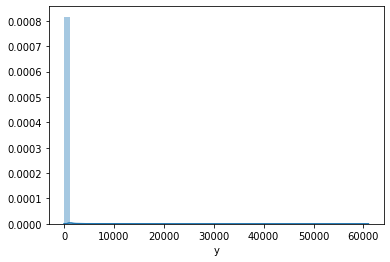

In [3]:
#histogram
sns.distplot(train['y']);

## 散布図
参照  
https://qiita.com/hik0107/items/3dc541158fceb3156ee0
### ２値の比較

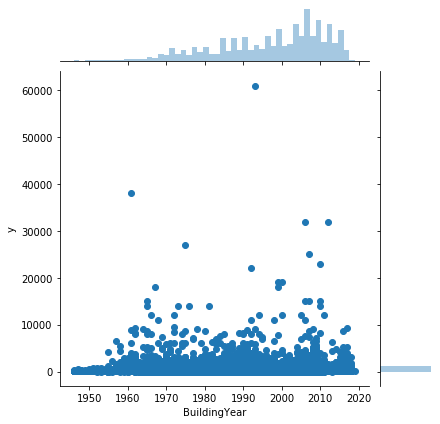

In [5]:
sns.jointplot('BuildingYear', 'y', data=data)

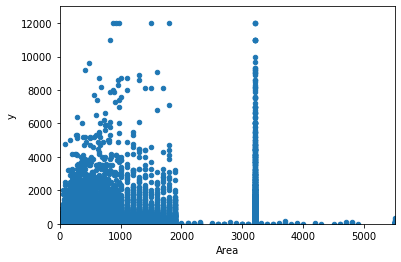

In [6]:
# 範囲を指定して可視化
sca = pd.concat([data['Area'], train_data['y']], axis=1)
sca.plot.scatter(x='Area', y='y', xlim=(0,5500), ylim=(0,13000));

### 散布図祭り

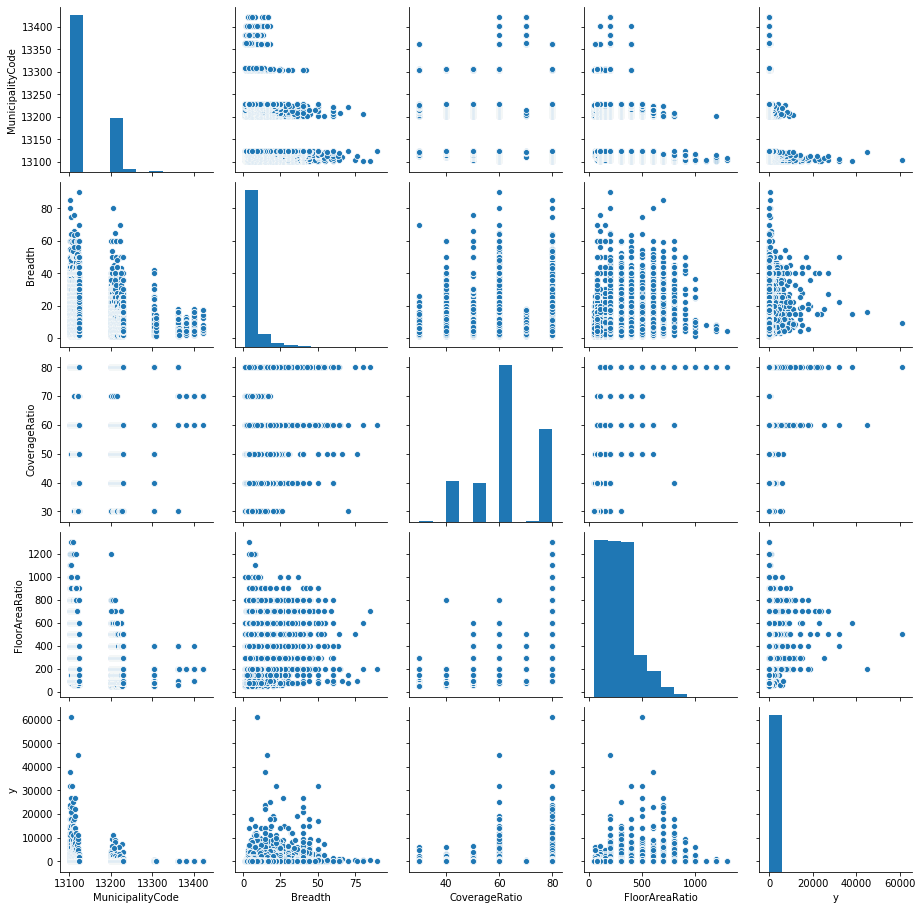

In [8]:
sns.pairplot(train)

## ヒートマップの表示
参照  
https://pythondatascience.plavox.info/seaborn/heatmap

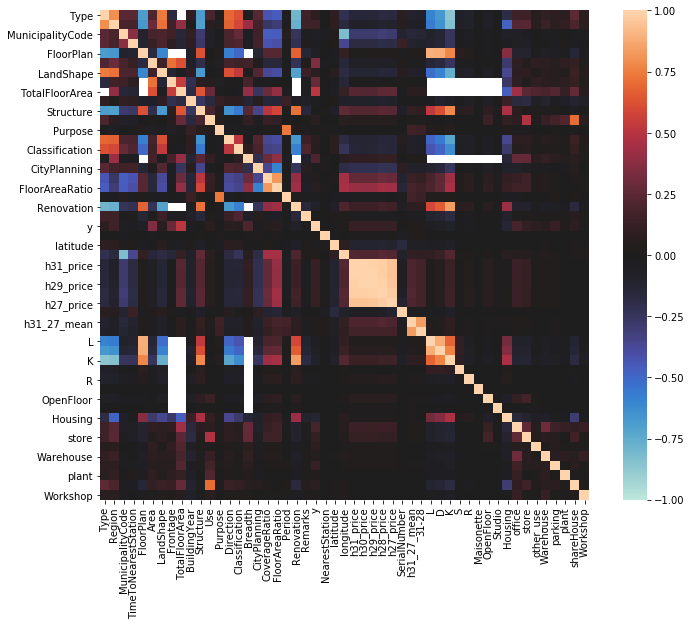

In [7]:
# data.corr()で相関を一括で取得
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(data.corr(), square=True, vmax=1, vmin=-1, center=0)
plt.savefig('seaborn_heatmap_corr.png')

## 折れ線表示

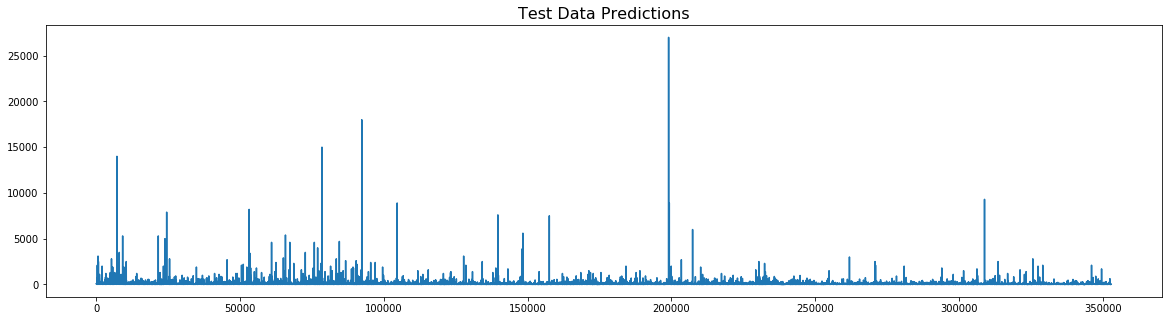

In [11]:
plt.figure(figsize=(20,5))
res = 10
plt.plot(range(0,train.shape[0],res), train.y[0::res])
# 並べて表示も可能
# plt.plot(range(0,sub4.shape[0],res), y_pred_2[0::res])

plt.title('Test Data Predictions',size=16)
plt.show()

## カラム情報を見る

In [4]:
train_data['Area'].describe()

count    352857.000000
mean        123.455893
std         254.173630
min          10.000000
25%          50.000000
50%          75.000000
75%         120.000000
max        5500.000000
Name: Area, dtype: float64

## 条件抽出

In [12]:
data.query('Area > 3000')

,Type,Region,MunicipalityCode,TimeToNearestStation,FloorPlan,Area,LandShape,Frontage,TotalFloorArea,BuildingYear,...,Studio,Housing,office,store,other_use,Warehouse,parking,plant,shareHouse,Workshop
814,2,2,13101,6,0,3203,9,41.5,2500.0,1995.0,...,0,0,1,1,0,0,0,0,0,0
1909,0,0,13102,0,1,3203,0,NaN,NaN,2016.0,...,0,0,0,0,0,0,0,0,0,0
5446,1,4,13103,14,0,3203,9,44.5,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6318,2,1,13103,6,0,3203,1,60.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7516,2,2,13103,3,0,3203,4,60.0,2500.0,1998.0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387674,1,3,13401,10,0,3203,9,48.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
387676,1,3,13401,10,0,3203,5,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
387677,1,3,13401,10,0,3203,5,60.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
387678,1,3,13401,10,0,3203,5,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


## Grouping
- group
- apply
- transform

参照  
- https://deepage.net/features/pandas-groupby.html
- https://deepage.net/features/pandas-count.html#groupby%E3%81%A8count%E3%81%AE%E4%BD%B5%E7%94%A8

### grouper.group_info[0]
グループごとに固有IDを振り分ける

In [14]:
data['building_id'] = data.groupby(['MunicipalityCode', 'TimeToNearestStation','BuildingYear', 'Structure', 'Use', 'NearestStation', 'FloorPlan']
                              ).grouper.group_info[0]


### transform()
グループごとにyの計算をする

In [17]:
# maxとminの比
max_min = lambda x : x.max() / x.min()
# 平均
y_mean = lambda x : x.mean()

data['y_max_min'] = data.groupby(['MunicipalityCode', 'TimeToNearestStation','BuildingYear', 'Structure', 'Use', 'NearestStation', 'FloorPlan']
                              )['y'].transform(max_min)

### グループの個数を算出(違うのがあるはず...)

In [20]:
#グループの個数
data['1'] = 1
sum_1 = lambda x : x.sum()
data['sum_1'] = data.groupby(['MunicipalityCode', 'TimeToNearestStation','BuildingYear', 'Structure', 'Use', 'NearestStation', 'FloorPlan']
                              )['1'].transform(sum_1)


## pandas-profiling

In [10]:
pdp.ProfileReport(data)

KeyboardInterrupt: 